<a href="https://colab.research.google.com/github/luisscrc/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs #ayuda a crear el dataset

In [48]:
X,Y = make_blobs(n_samples=30, n_features=2, centers=2, random_state=2, center_box=(0,10)) #crea el dataset

In [49]:
clf = svm.SVC(kernel='linear',C=100) # support vector classification C=100 son 100 veces el cálculo de dibujar la línea
clf.fit(X,Y)


SVC(C=100, kernel='linear')

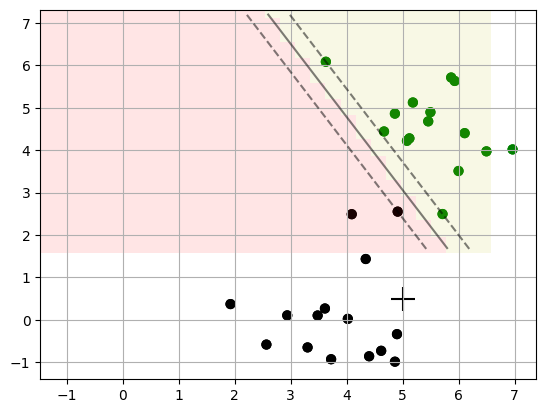

In [50]:
from matplotlib.colors import ListedColormap
cmap = matplotlib.colors.ListedColormap(['k','g'])
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=cmap) # Grafica

cmap = matplotlib.colors.ListedColormap(['k','g'])
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=cmap) # Grafica
ax=plt.gca() # Crea malla
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(xx,yy)
xy= np.vstack([XX.ravel(),YY.ravel()]).T # hace una transformada
Z = clf.decision_function(xy).reshape(XX.shape) # Hace el match entre la línea y la gráfica

ax.contour(XX,YY,Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--']) # Dibuja hiperplano

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap = matplotlib.colors.ListedColormap(['r','y'])
plt.pcolormesh(XX,YY,Z_pred,cmap = cmap, alpha=0.10)

new_x = [[5,0.5]]
new_z = clf.predict(new_x)

if new_z[0] == 0:
  color = 'k'
else:
  color = 'g'
plt.scatter(new_x[0][0],new_x[0][1],marker = '+',color= color, s=300)
plt.grid()
plt.show()

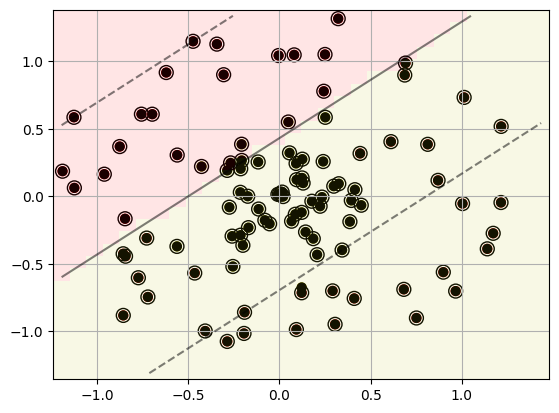

In [51]:
from sklearn.datasets import make_circles

X,y = make_circles(100,factor=.2,noise=.2)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = cmap)

clf = svm.SVC(kernel='linear', C=100).fit(X,y)

cmap = matplotlib.colors.ListedColormap(['k'],['g'])
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = cmap)

ax=plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(xx,yy)
xy= np.vstack([XX.ravel(),YY.ravel()]).T # hace una transformada
Z = clf.decision_function(xy).reshape(XX.shape) # Hace el match entre la línea y la gráfica

ax.contour(XX,YY,Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--']) # Dibuja hiperplano

ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100, facecolors = 'none', edgecolors = 'k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap = matplotlib.colors.ListedColormap(['r','y'])
plt.pcolormesh(XX,YY,Z_pred,cmap = cmap, alpha=0.10)

plt.grid()
plt.show()

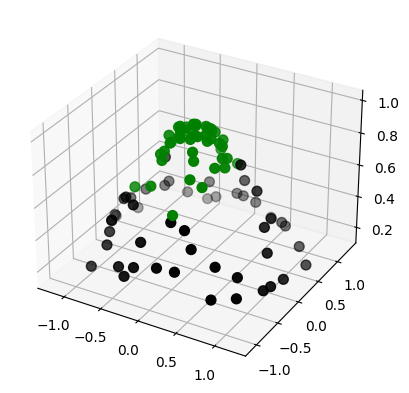

In [52]:
# Veamos el efecto del truco kernel (aumentando la dimensionalidad del espacio de entradas)
from mpl_toolkits import mplot3d

# Aplicamos una operación de kernel gaussiano para separar las clases
# Gamma controla el efecto del kernel, si es muy pequeño el modelo se parece al lineal
gamma = 1
Xr = np.exp(-gamma*(X ** 2).sum(1))

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=50, cmap=cmap)